**Data Engineer Challenge with Python**

**Deskripsi :**

Project ini berupa tes untuk melihat kemampuan kamu dalam mulai berkarir menjadi Data Engineer. Tes ini terdiri atas 2 (dua) bagian, yaitu: 
1.	**Web Scraping**, yang dirancang untuk memperlihatkan kemampuan member dalam mengambil data dari website dalam bentuk data HTML.
2.	**Function and Regular Expression**, yang dirancang untuk memperlihatkan pengetahuan member terkait dasar-dasar pembuatan sebuah function dan penggunaan Regular Expression dalam bahasa pemrograman Python.


# **1.	Web Scraping**

•	diminta untuk menggali informasi dari https://id.wikipedia.org/wiki/Demografi_Indonesia menggunakan bahasa pemrograman Python. 

•	Buatlah suatu script Python untuk menyimpan tabel "Jumlah Penduduk menurut Provinsi" dari web tersebut dengan format CSV.

•	File CSV menggunakan format double-apostrophe quoting (") dan disimpan dengan nama "Indonesia_Demography_by_Province.csv"

Kolom yang perlu diambil adalah sebagai berikut.
•	Kode BPS

•	Nama

•	Ibu Kota

•	Populasi

•	Luas km

•	Pulau


In [7]:
#import library yang dibutuhkan
import pandas as pd
import requests
from bs4 import BeautifulSoup

#membuat request ke website
website_url = requests.get('https://id.wikipedia.org/wiki/Demografi_Indonesia').text
soup = BeautifulSoup(website_url, 'lxml')

#mengambil table dengan class 'wikitable sortable'
my_table = soup.find('table', {'class':'wikitable sortable'})

#mencari data dengan tag 'td'
links = my_table.findAll('td')

#membuat lists kosong
kode_bps = []
nama = []
ibu_kota = []
populasi = []
luas_km = []
pulau = []

#memasukkan data ke dalam list berdasarkan pola HTML
for i, link in enumerate(links):
  if i in range(0, len(links), 9):
  	kode_bps.append(link.get_text())
  if i in range(2, len(links), 9):
  	nama.append(link.get_text())
  if i in range(4, len(links), 9):
  	ibu_kota.append(link.get_text())
  if i in range(5, len(links), 9):
  	populasi.append(link.get_text())
  if i in range(6, len(links), 9):
  	luas_km.append(link.get_text())
  if i in range(8, len(links), 9):
  	pulau.append(link.get_text()[:-1])
   
#membuat DatFrame dan masukkan ke CSV
df = pd.DataFrame()
df['Kode BPS'] = kode_bps
df['Nama'] = nama
df['Ibu Kota'] = ibu_kota
df['Populasi'] = populasi
df['Luas km'] = luas_km
df['Pulau'] = pulau
df.to_csv('Indonesia_Demography_by_Province.csv', index=False, encoding='utf-8', quoting=1)

# **2.	Function and Regular Expression**

•	Diminta untuk membuat suatu fungsi yang bernama “email_check” untuk menyaring beberapa email menggunakan regular expression dalam bahasa pemrograman Python. 

•	Fungsi ini akan menerima suatu parameter yang bernama **“input”** yang mana merupakan email dan output-nya akan berupa **“Pass”** atau **“Not Pass”**. Fungsinya harus memenuhi pola berikut :

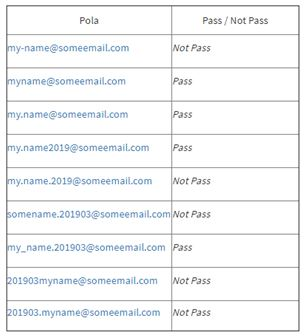

In [6]:
import re

#function email_check
def email_check(input):
	match = re.search('(?=^((?!-).)*$)(?=[^0-9])((?=^((?!\.\d).)*$)|(?=.*_))',input )
	if match:
		print('Pass')
	else:
		print('Not Pass')

#Masukkan data email ke dalam list
emails = ['my-name@someemail.com', 'myname@someemail.com','my.name@someemail.com',
'my.name2019@someemail.com', 'my.name.2019@someemail.com',
'somename.201903@someemail.com','my_name.201903@someemail.com',
'201903myname@someemail.com', '201903.myname@someemail.com']


#Looping untuk pengecekan Pass atau Not Pass
for email in emails :
	email_check(email)


Not Pass
Pass
Pass
Pass
Not Pass
Not Pass
Pass
Not Pass
Not Pass
